In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255
X_test  = X_test.reshape (10000, 28, 28, 1).astype('float32') / 255


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

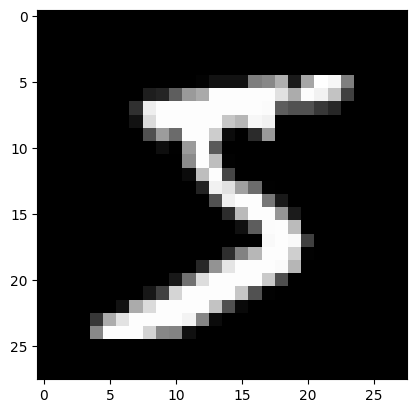

In [2]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [3]:
plt.imshow(X_train[0].reshape((1,784)), cmap='gray')
plt.axis('off')
plt.show()

In [5]:
model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history_ann = model_ann.fit(X_train, y_train, epochs=10, validation_split=0.1)

model_ann.save('model_ann.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


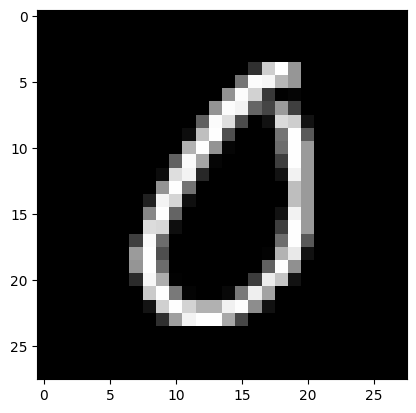

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
0


In [26]:
img = X_train[6723]

plt.imshow(img, cmap='gray')
plt.show()

img = img.reshape(1, 28,28)

pred = np.argmax(model_ann.predict(img))
print(pred)

In [13]:
import requests

image_url = "https://cdn.pixabay.com/photo/2015/04/04/19/13/two-706896_1280.jpg"
filename = "image.jpg"

response = requests.get(image_url, stream=True)

if response.status_code == 200:
    with open(filename, "wb") as f:
        for chunk in response.iter_content(1024):
            f.write(chunk)

    print(f"Image downloaded successfully as {filename}")

Image downloaded successfully as image.jpg


In [14]:
import cv2

# Load the image
img = cv2.imread('image.jpg')

resized_img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

resized_img

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254,  42,  97,
         91,  32, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 254, 118,  18, 130, 130,
        130, 129,  30,  79,  27, 214, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 254,  19, 130, 130, 130, 130,
        130, 130, 130, 130,  98,  75,  58, 254, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255,  31, 130, 130, 130, 130, 130,
        130, 130, 130, 130, 131,  18, 100,  98, 252, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 111, 130, 130, 130,  62, 120, 112,
         55, 130, 130, 130, 130, 175,  57,  68,  80, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255,  34, 130, 130, 129,  15,  11,  11,
          9,  22, 130, 130, 130,  33,  25,  29,  34, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 135, 130, 130, 130,  13,  13,  12,
         13, 156, 130, 130, 130, 130,  23,  21,  22, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 248,  67,  85, 130,  18,  20,  19,  19,
        254, 155, 130, 130, 130, 129,  20,  22,  22, 253, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 254,  39,   9,  22,  22,  23,
        255,  22, 130, 130, 130,  82,  21,  21,  21, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        191, 129, 130, 130, 130, 134,  16,  17,  17, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  33,
         13, 130, 130, 130, 129,  15,  12,  12,  14, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 189,  18,
        130, 130, 130, 131,  80,  12,  12,  12, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  30,  18, 130,
        130, 130, 129, 134,  11,  11,  12, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255,  69,  19, 130, 130,
        130, 130, 108,  11,  11,  11, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 166, 135, 130, 130, 130,
        126,  48,  11,  11,  10, 254, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 146, 137, 130, 130, 130, 145,
         20,  11,  11, 239, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 253,  75, 130, 130, 130, 130, 110,  10,
         19,  19,  18,  18,  18,  18,  18,  18,  18,  28, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 248, 130, 130, 130, 129,  99,  25,  22,
         37,  58,  83, 100, 118, 128,  19,  22,  22,  20, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 248, 130, 130, 130, 130, 130, 130, 130,
        130, 130, 130, 130, 130, 130,  16,  22,  22,  23, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 248, 130, 130, 130, 130, 130, 130, 130,
        130, 130, 130, 130, 130, 130,  10,  22,  22, 251, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 247,  53,  23,  44, 132, 129, 130, 130,
        130, 130, 130, 130, 130, 130,  26,  22,  22, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 25

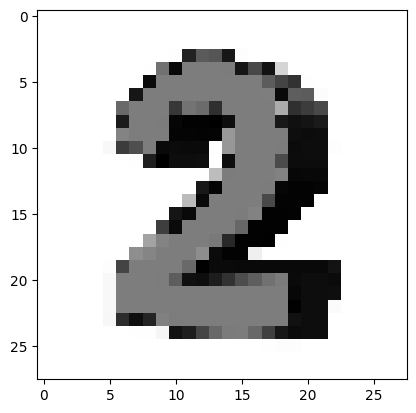

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
7


In [15]:
import matplotlib.pyplot as plt

img = resized_img/255.

plt.imshow(img, cmap='gray')
plt.show()

print(np.argmax(model_ann.predict(resized_img.reshape(1, 28, 28))))

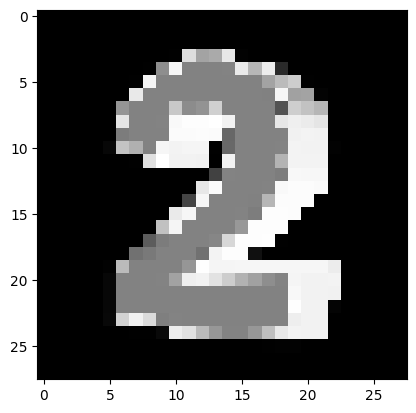

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
8


In [16]:
img = 1. - img

plt.imshow(img, cmap='gray')
plt.show()

print(np.argmax(model_ann.predict(img.reshape(1, 28, 28))))

In [19]:
image_url = 'https://i.sstatic.net/RdEpj.png'
filename = "digit.jpg"

response = requests.get(image_url, stream=True)

if response.status_code == 200:
    with open(filename, "wb") as f:
        for chunk in response.iter_content(1024):
            f.write(chunk)

    print(f"Image downloaded successfully as {filename}")

Image downloaded successfully as digit.jpg


In [21]:
img = cv2.imread('digit.jpg')

resized_img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

resized_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  44, 232,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 201, 250,  69,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 201, 249, 253,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  18, 242, 255, 243,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 140, 255, 255, 238,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         26, 197, 255, 220,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  59,
        217, 254, 244,  74,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 183,
        255, 247, 154,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 191, 255,
        255, 139,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240, 255,
        239,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 175, 253, 255,
        201,   0,   0,  40, 110, 110,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 255, 255, 255,
        221,  76, 219, 232, 255, 255, 165,  52,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  19, 180, 255, 255, 255,
        255, 255, 255, 240, 239, 240, 255, 179,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 140, 254, 255, 255, 255,
        247, 139, 139,  17,   0,  43, 255,  37,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98, 252, 255, 255, 161,
          0,   0,   0,   0,   0,  20, 105,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 102, 251, 255, 255,  74,
          0,   0,   0,  99, 143, 242,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  73, 223, 255, 255, 238,
        191, 191, 238, 246, 166,  75,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  84, 139, 185, 255,
        255, 199,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

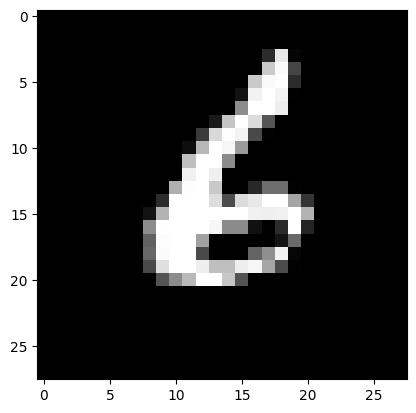

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6


In [23]:
import matplotlib.pyplot as plt

img = resized_img/255.

plt.imshow(img - 1., cmap='gray')
plt.show()

print(np.argmax(model_ann.predict(resized_img.reshape(1, 28, 28))))